In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

## Explore Data

In [2]:
df = pd.read_csv('sentiment_tweets3.csv')
df.count()

Index                        10314
message to examine           10314
label (depression result)    10314
dtype: int64

In [3]:
df.sample(10)

,Index,message to examine,label (depression result)
3533,358331,@birdblogger so happy maybe it was the same on...,0
6820,678091,bored need something to do!! But what to do i ...,0
8341,800341,I am Lowkey going through depression that I'm ...,1
597,60642,"@theresanoelle Okay, I'll keep a look out for ...",0
5839,582936,@SaraLHValo Oh I'm so glad to hear that!!! E...,0
8459,800459,Fuck my family I literally told them I'm getti...,1
8820,800820,How is depression related to education? by OC...,1
1904,195291,"@AnnaHill Doubg great, thanks!",0
3694,374353,star trek is an amazing film! now in nandos wa...,0
2915,297410,@Protium we have no morals remember,0


In [4]:
df = df.drop(columns='Index')

In [5]:
label = df['label (depression result)'].value_counts()
label

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

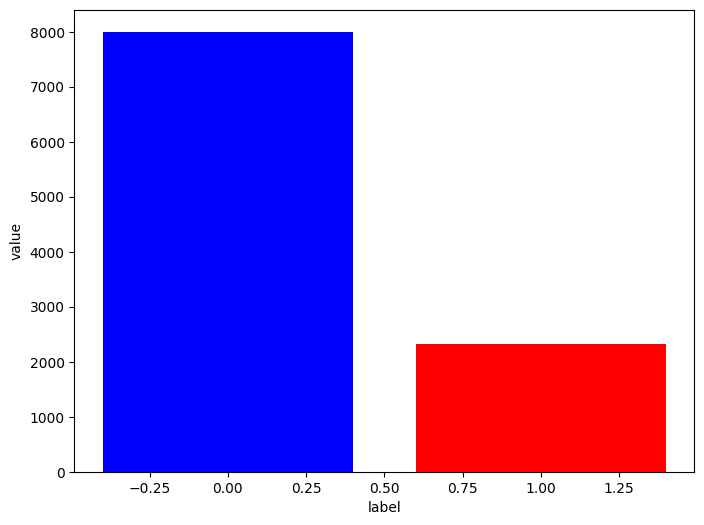

In [6]:
#plot label bar chart
plt.figure(figsize=(8,6))
plt.bar(label.index, label.values, color = ['blue', 'red'])
plt.xlabel('label')
plt.ylabel('value')
plt.show

## Data Cleaning

In [7]:
df['message to examine'] = df['message to examine'].str.replace(r'[^\w]', ' ',regex=True) #repalce any symbole 
df['message to examine'] = df['message to examine'].str.replace(r'[0-9]', ' ',regex=True) #delete any number
df['message to examine'] = df['message to examine'].str.replace('_', ' ') #replace under_line with withe space
df['message to examine'] = df['message to examine'].str.lower() #change to lower case all the text
df.iloc[7:20]

,message to examine,label (depression result)
7,or ï ½c possible today nice,0
8,nite twitterville workout in the am ciao,0
9,dananner night darlin sweet dreams to you,0
10,good morning everybody,0
11,finally i just created my wordpress blog the...,0
12,kisha they cnt get over u til they get out frm...,0
13,nicolerichie yes i remember that band it was...,0
14,i really love reflections and shadows,0
15,blueaero ooo it s fantasy i like fantasy no...,0
16,rokchic no probs i sell nothing other than...,0


In [8]:
#drop duplication
df = df.drop_duplicates() 

## preprocessing with nltk

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
sw = stopwords.words('english') #stop words list
lemmatizer = WordNetLemmatizer() #word lemmatizer

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('punkt')
#nltk.download('punkt_tab')
# test the sent_tokenize, word_tokenize to how it's working 
text = "This is a test sentence. It has multiple words. It has punctuation. It has a number: 12345"

print(sent_tokenize(text))

['This is a test sentence.', 'It has multiple words.', 'It has punctuation.', 'It has a number: 12345']


In [11]:
#process data function to remove stop words and lemmatize words 
def process_text(messy_string):
    cleanned = ' '.join([lemmatizer.lemmatize(word) for phrase in sent_tokenize(messy_string) for word in word_tokenize(phrase) if word not in sw])
    return cleanned

In [12]:
#testing the process_text function 
text = "This is a test sentence. It has multiple words. It has punctuation. It has a number: 12345"
process_text(text)

'This test sentence . It multiple word . It punctuation . It number : 12345'

In [13]:
#apply process_data function
df['message to examine'] = df['message to examine'].apply(process_text)
df.sample(10)

,message to examine,label (depression result)
3902,berrymangirl talking another friend listen col...,0
8684,pretending depression isnt constantly smotheri...,1
10184,depression like trying get guitar pick guitar ...,1
2206,tsukinohikari obviously,0
4478,equalroots,0
5929,northeastbunny live east london quite close ol...,0
6006,got ap blink coverr excited read,0
725,hi school model search work today aka employee...,0
1975,ok bad even trip subject ese lmao,0
8837,eating like pig depression,1


## Model

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#using tfidf 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['message to examine']) #X values
y = df['label (depression result)'] #y values

In [15]:
from sklearn.model_selection import train_test_split
# split our train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [16]:
from sklearn.linear_model import LogisticRegression
# using logistic regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
#predict our test values
y_ = lr.predict(X_test) 

### Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1613
           1       1.00      0.92      0.96       442

    accuracy                           0.98      2055
   macro avg       0.99      0.96      0.97      2055
weighted avg       0.98      0.98      0.98      2055



### Confiusion Matrix Plot

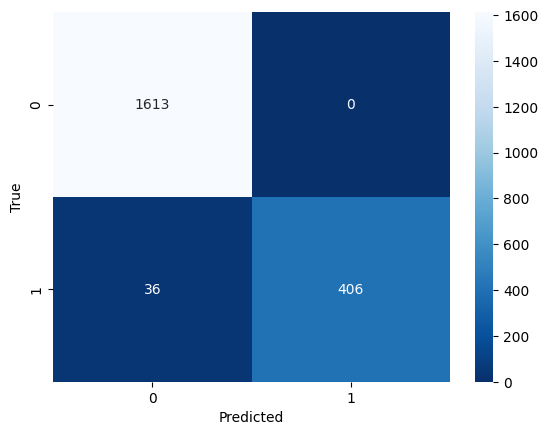

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_test, y_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### svm model

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

### Evaluate Model

In [36]:
y_predict = svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1613
           1       1.00      0.97      0.99       442

    accuracy                           0.99      2055
   macro avg       1.00      0.99      0.99      2055
weighted avg       0.99      0.99      0.99      2055



### Confiusion Matrix Plot

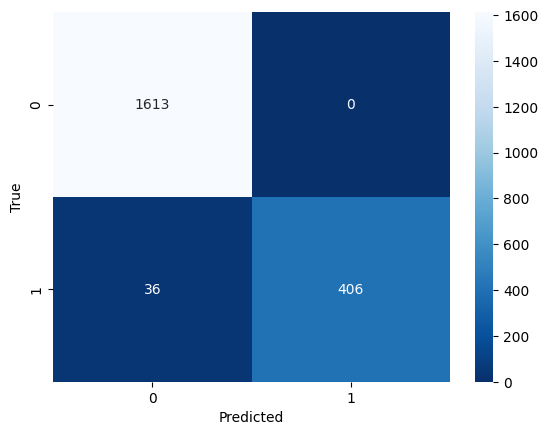

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cm = confusion_matrix(y_test, y_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Deep Model

In [20]:
import tensorflow as tf
from tensorflow import keras 

In [21]:
#keras model to predict
model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(
    loss="binary_crossentropy", # binary crossentropy to evaluate model
    optimizer="sgd", 
    metrics=["accuracy"]
)

In [23]:
# Fit the model 
history = model.fit(
    X_train, y_train, epochs=30,validation_split=0.18
)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7641 - loss: 0.6372 - val_accuracy: 0.7797 - val_loss: 0.5415
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7682 - loss: 0.5461 - val_accuracy: 0.7797 - val_loss: 0.5267
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7758 - loss: 0.5305 - val_accuracy: 0.7797 - val_loss: 0.5243
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.5332 - val_accuracy: 0.7797 - val_loss: 0.5223
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7780 - loss: 0.5240 - val_accuracy: 0.7797 - val_loss: 0.5203
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.5226 - val_accuracy: 0.7797 - val_loss: 0.5179
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 0.5301 - val_accuracy: 0.7797 - val_loss: 0.5151
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7714 - loss: 0.5240 - val_accuracy: 0.

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     2,047,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,052,203 (7.83 MB)

 Trainable params: 2,052,201 (7.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [26]:
evl = model.evaluate(X_test, y_test)
print('loss evaluation: ', evl[0])
print('accuracy score: ', evl[1])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.1032
loss evaluation:  0.10261668264865875
accuracy score:  0.9810218811035156


In [32]:
# save history
print(history.history)

{'accuracy': [0.774035632610321, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.7755193114280701, 0.775667667388916, 0.7774480581283569, 0.8011869192123413, 0.8347181081771851, 0.8623145222663879, 0.8897626399993896, 0.9206231236457825, 0.9419881105422974, 0.9540059566497803, 0.9658753871917725, 0.9749258160591125, 0.9808605313301086, 0.9835311770439148], 'loss': [0.5961709022521973, 0.535851240158081, 0.5304009318351746, 0.5284322500228882, 0.5264981389045715, 0.5241866111755371, 0.5215074419975281, 0.5183400511741638, 0.5143200159072876, 0.5096739530563354, 0.5040509104728699, 0.4972778260707855, 0.48888352513313293, 0.4784777760505676, 0.4660174250602722, 0.450590044260025, 0.43216049671173096, 0.41037455201148987, 0.385564327239990

## plot loss

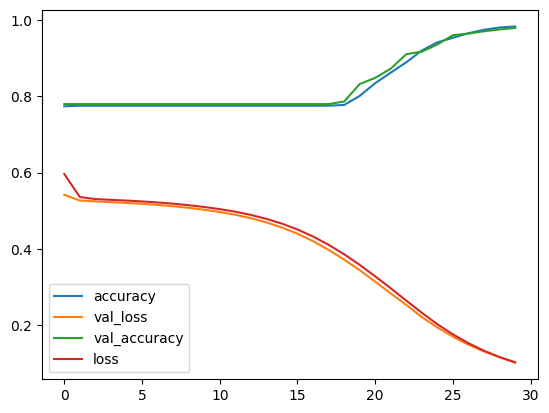

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()